# Sesión 2: Transformación  y aseguramiento de calidad


Esta práctica se realizará sobre los datos obtenidos de la página https://www.kaggle.com
<br> Antes de iniciar acceda al archivo ReadMe.txt disponible en la carpeta y revise la descripción de los datos a trabajar en la sesión.

### Preparación del ambiente de trabajo
#### Cargue de librerías

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Lectura de los datos
<br> Ingrese a la carpeta compartida en Onedrive TALLER 2 y descargue los 3 archivos disponibles, tenga en cuenta que están en formato distinto
<br> Configuración del directorio

In [ ]:
%cd C:\Users\X1 Carbon\OneDrive\Documentos\1_NEICON\1_Proyectos\2_Carpeta Tito\Capacitación UniAndes_Ecopetrol\Datsets\Taller_2\Modificados

In [2]:
# Cague de los archivos en formato texto o excel
df_PdM_telemetry=pd.read_csv('PdM_telemetry.csv', sep=';')
df_PdM_telemetry.head(4)

,datetime,machineID,volt,rotate,pressure,vibration,Columna1
0,8/12/2015 15:00,79,194.071741,484.698993,101.085953,47.317101,NaN
1,11/12/2015 06:00,15,153.546984,454.170621,113.613686,38.416344,NaN
2,28/6/2015 20:00,62,122.492361,386.409669,102.970808,41.206891,NaN
3,24/7/2015 04:00,51,183.098835,448.021654,108.709299,41.493329,NaN


In [3]:
df_PdM_errors=pd.read_excel('PdM_errors.xlsx')
df_PdM_errors.head(4)

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4


### Exploración de los datos
<br> Utilice los comandos aprendidos en la sesión 1 para explorar los datos disponibles en los dataset PdM_telemetry y PdM_errors
<br> Analice la cantidad de registros, cantidad y tipo de variables

In [4]:
# Vamos a cargar el archivo con todas las hojas disponibles en el archivo, creando un diccionario
archivo_excel = pd.read_excel('Dataset_integrado.xlsx', sheet_name=None)

# Revisamos los nombres de las hojas
print("Hojas disponibles:", archivo_excel.keys())

Hojas disponibles: dict_keys(['PdM_machines', 'PdM_failures', 'PdM_maint'])


In [5]:
# Para visualizar el contenido de cada hoja usamos esta instrucción
for nombre_hoja, df in archivo_excel.items():
    print(f"\nMostrando las primeras filas de la hoja: {nombre_hoja}")
    print(df.head())


Mostrando las primeras filas de la hoja: PdM_machines
   machineID   model  age
0          1  model3   18
1          2  model4    7
2          3  model3    8
3          4  model3    7
4          5  model3    2

Mostrando las primeras filas de la hoja: PdM_failures
             datetime  machineID failure
0 2015-01-05 06:00:00          1   comp4
1 2015-03-06 06:00:00          1   comp1
2 2015-04-20 06:00:00          1   comp2
3 2015-06-19 06:00:00          1   comp4
4 2015-09-02 06:00:00          1   comp4

Mostrando las primeras filas de la hoja: PdM_maint
             datetime  machineID   comp
0 2014-06-01 06:00:00          1  comp2
1 2014-07-16 06:00:00          1  comp4
2 2014-07-31 06:00:00          1  comp3
3 2014-12-13 06:00:00          1  comp1
4 2015-01-05 06:00:00          1  comp4


In [6]:
## Comando Para crear un dataframe con el contenido de cada hoja
#df_hoja1 = archivo_excel['Hoja1']  # reemplaza 'Hoja1' por el nombre real

#Acá el ejemplo para los datos de PdM_failures, replica el ejercicio para todas y realiza una exploración rápida del contenido empleando 
#lo aprendido en la sesion anterior

df_PdM_maint = archivo_excel['PdM_maint']

df_PdM_failures = archivo_excel['PdM_failures']

df_PdM_machines = archivo_excel['PdM_machines']


In [10]:
df_PdM_failures.shape

(761, 3)

In [8]:
df_PdM_errors.shape

(4114, 3)

In [11]:
df_PdM_maint.shape

(3286, 3)

In [13]:
df_PdM_machines.shape

(100, 3)

In [14]:
df_PdM_telemetry.shape

(876120, 7)

In [15]:
df_PdM_failures.dtypes

datetime     datetime64[ns]
machineID             int64
failure              object
dtype: object

In [16]:
df_PdM_errors.dtypes

datetime     datetime64[ns]
machineID             int64
errorID              object
dtype: object

In [17]:
df_PdM_maint.dtypes

datetime     datetime64[ns]
machineID             int64
comp                 object
dtype: object

In [18]:
df_PdM_machines.dtypes

machineID     int64
model        object
age           int64
dtype: object

In [19]:
df_PdM_telemetry.dtypes

datetime      object
machineID      int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
Columna1     float64
dtype: object

### Quiz:
#### 1. ¿Cuántos dataset hay en total? 5 dataset
#### 2. ¿Qué cantidad de registro tiene cada dataset?  
##### df_PdM_failures n = 761
##### df_PdM_errors n = 4114
##### df_PdM_maint n = 3286
##### df_PdM_PdM_machines n = 100
##### df_PdM_telemetry n = 876120
#### 3. ¿Qué cantidad de variables tiene cada dataset?
##### df_PdM_failures: 3
##### df_PdM_errors: 3
##### df_PdM_maint: 3
##### df_PdM_PdM_machines: 3
##### df_PdM_telemetry: 7
#### 4. ¿Qué tipo de datos contiene cada dataset?
##### df_PdM_failures: datetime, int64, object
##### df_PdM_errors: datetime, int64, object
##### df_PdM_maint: datetime, int64, object
##### df_PdM_PdM_machines: int64, object
##### df_PdM_telemetry: object, int64, float64

In [21]:
df_PdM_telemetry.isna().sum()

datetime          0
machineID         0
volt              0
rotate            0
pressure        100
vibration         0
Columna1     876120
dtype: int64

In [23]:
df_PdM_telemetry.duplicated().sum()

np.int64(20)

## Evaluación de calidad de los datos

In [20]:
#Para la exploración de variables vamos a utilizar una nueva librería.  Si esta no está disponible, la puede instalar en el 
#promt de Anaconda con la siguiente instrucción.  pip install ydata-profiling
# Para facilitar el ejercicio listamos los dataframe que hemos cargado, así podrá copiar y pegar el nombre en las dos líneas de la siguiente sintáxis:
# df_PdM_machines, df_PdM_failures, df_PdM_c, df_PdM_errors, df_PdM_telemetry

from ydata_profiling import ProfileReport

profile = ProfileReport(df_PdM_telemetry)  #Esta sintaxis genera el reporte
profile.to_file("Reporte_PdM_telemetry") #Esta sintaxis guarda el reporte en un archivo HTML **Recomendado**

ModuleNotFoundError: No module named 'ydata_profiling'

Realice un breve informe de los resultados de la evaluación de calidad.
<br>¿hay ajustes que realizar a los datos?

## Mejoramiento de calidad de los datos

### Eliminación de duplicados

In [25]:
df_PdM_telemetry.shape

(876120, 7)

In [24]:
# Elimina duplicados para el dataframe df_PdM_telemetry
telemetry_sin_duplicados = df_PdM_telemetry.drop_duplicates() 
telemetry_sin_duplicados.shape

(876100, 7)

### Corrección de valores extremos - Categorización

In [26]:
### Crea 5 grupos de igual amplitud sobre los valores de la variable volt del dataset telemetry_sin_duplicados
### Almacena el resultado en la variable GRUPO_Volt
    
# Creamos una copia del dataframe original
telemetry_sin_duplicados = telemetry_sin_duplicados.copy()

telemetry_sin_duplicados.loc[:, 'GRUPO_Volt'] = pd.cut(
    telemetry_sin_duplicados['volt'],
    bins=5,  # número de categorías deseadas
    labels=['GRUPO1', 'GRUPO2', 'GRUPO3', 'GRUPO4', 'GRUPO5'],
    include_lowest=True
)

telemetry_sin_duplicados.head()

,datetime,machineID,volt,rotate,pressure,vibration,Columna1,GRUPO_Volt
0,8/12/2015 15:00,79,194.071741,484.698993,101.085953,47.317101,NaN,GRUPO2
1,11/12/2015 06:00,15,153.546984,454.170621,113.613686,38.416344,NaN,GRUPO1
2,28/6/2015 20:00,62,122.492361,386.409669,102.970808,41.206891,NaN,GRUPO1
3,24/7/2015 04:00,51,183.098835,448.021654,108.709299,41.493329,NaN,GRUPO2
4,28/1/2015 15:00,60,167.079133,404.744703,104.446543,35.706153,NaN,GRUPO2


In [29]:
# Vamos a validar si el valor extremo queda en el grupo 5

# Filtramos el dataframe
filtro_G5 = telemetry_sin_duplicados[telemetry_sin_duplicados['GRUPO_Volt'] == 'GRUPO5']

# Ordenamos el dataframe de manera descendente
data_ordenado = filtro_G5.sort_values(by='volt', ascending=False)
data_ordenado.head(7)

,datetime,machineID,volt,rotate,pressure,vibration,Columna1,GRUPO_Volt
93107,21/9/2015 14:00,39,382.687076,481.239810,NaN,46.432730,NaN,GRUPO5
717516,15/12/2015 08:00,64,382.687076,371.393288,NaN,37.055618,NaN,GRUPO5
742953,14/12/2015 20:00,61,382.687076,405.128743,NaN,40.031070,NaN,GRUPO5
759631,17/1/2015 11:00,13,382.687076,520.070835,NaN,38.855552,NaN,GRUPO5
780556,8/5/2015 07:00,25,382.687076,384.628061,NaN,52.098697,NaN,GRUPO5


In [33]:
# Contamos cuantos registros quedaron en cada Grupo
frecuencia_Grupos = telemetry_sin_duplicados['GRUPO_Volt'].value_counts()
print(frecuencia_Grupos)

GRUPO_Volt
GRUPO2    744544
GRUPO1    126347
GRUPO3      5204
GRUPO5         5
GRUPO4         0
Name: count, dtype: int64


In [34]:
# Sintaxis para crear 5 grupos con cortes pesonalizados

def categorizar(x):
    if x <= 155:
        return 'GRUPO1'
    elif x <= 168:
        return 'GRUPO2'
    elif x <= 195:
        return 'GRUPO3'
    else:
        return 'GRUPO4'

telemetry_sin_duplicados.loc[:, 'GRUPO_Volt_2'] = telemetry_sin_duplicados['volt'].apply(categorizar)
telemetry_sin_duplicados.head()

,datetime,machineID,volt,rotate,pressure,vibration,Columna1,GRUPO_Volt,GRUPO_Volt_2
0,8/12/2015 15:00,79,194.071741,484.698993,101.085953,47.317101,NaN,GRUPO2,GRUPO3
1,11/12/2015 06:00,15,153.546984,454.170621,113.613686,38.416344,NaN,GRUPO1,GRUPO1
2,28/6/2015 20:00,62,122.492361,386.409669,102.970808,41.206891,NaN,GRUPO1,GRUPO1
3,24/7/2015 04:00,51,183.098835,448.021654,108.709299,41.493329,NaN,GRUPO2,GRUPO3
4,28/1/2015 15:00,60,167.079133,404.744703,104.446543,35.706153,NaN,GRUPO2,GRUPO2


In [35]:
# Contamos cuantos registros quedaron en cada Grupo y comparamos si hubo cambios según la forma de agrupar
Tabla = pd.crosstab(
    index=telemetry_sin_duplicados['GRUPO_Volt'],
    columns=telemetry_sin_duplicados['GRUPO_Volt_2'],
    margins=True,                # Agrega totales
    margins_name='Total'        # Nombre de la fila/columna de totales
)

Tabla

GRUPO_Volt_2,GRUPO1,GRUPO2,GRUPO3,GRUPO4,Total
GRUPO_Volt,,,,,
GRUPO1,126347,0,0,0,126347
GRUPO2,7975,244354,444358,47857,744544
GRUPO3,0,0,0,5204,5204
GRUPO5,0,0,0,5,5
Total,134322,244354,444358,53066,876100


In [36]:
# Porcentaje sobre el total general
tabla_porcentaje_total = Tabla / Tabla.loc['Total', 'Total']*100
tabla_porcentaje_total = tabla_porcentaje_total.map(lambda x: f"{x:.2f}%")
tabla_porcentaje_total


GRUPO_Volt_2,GRUPO1,GRUPO2,GRUPO3,GRUPO4,Total
GRUPO_Volt,,,,,
GRUPO1,14.42%,0.00%,0.00%,0.00%,14.42%
GRUPO2,0.91%,27.89%,50.72%,5.46%,84.98%
GRUPO3,0.00%,0.00%,0.00%,0.59%,0.59%
GRUPO5,0.00%,0.00%,0.00%,0.00%,0.00%
Total,15.33%,27.89%,50.72%,6.06%,100.00%


In [37]:
# segmentar por cuantiles y asignar etiquetas a cada Grupo 
telemetry_sin_duplicados['volt_grupo'] = pd.qcut(telemetry_sin_duplicados['volt'], q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Verifica el resultado
print(telemetry_sin_duplicados[['volt', 'volt_grupo']].head(10))


         volt  volt_grupo
0  194.071741        Alto
1  153.546984        Bajo
2  122.492361        Bajo
3  183.098835        Alto
4  167.079133  Medio-Bajo
5  147.973627        Bajo
6  153.472810        Bajo
7  186.109859        Alto
8  216.477793        Alto
9  167.311133  Medio-Bajo


In [38]:
frecuencia_Grupos = telemetry_sin_duplicados['volt_grupo'].value_counts()
print(frecuencia_Grupos)

volt_grupo
Bajo          219025
Medio-Bajo    219025
Medio-Alto    219025
Alto          219025
Name: count, dtype: int64


In [39]:
# segmentar por deciles
telemetry_sin_duplicados['volt_grupo'] = pd.qcut(telemetry_sin_duplicados['volt'], q=10)

# Verifica el resultado
print(telemetry_sin_duplicados[['volt', 'volt_grupo']].head(10))

         volt          volt_grupo
0  194.071741  (190.617, 382.687]
1  153.546984  (151.081, 157.729]
2  122.492361   (97.333, 151.081]
3  183.098835  (178.679, 183.615]
4  167.079133   (166.74, 170.607]
5  147.973627   (97.333, 151.081]
6  153.472810  (151.081, 157.729]
7  186.109859  (183.615, 190.617]
8  216.477793  (190.617, 382.687]
9  167.311133   (166.74, 170.607]


### Creacion de un nuevo dataset - Extracción

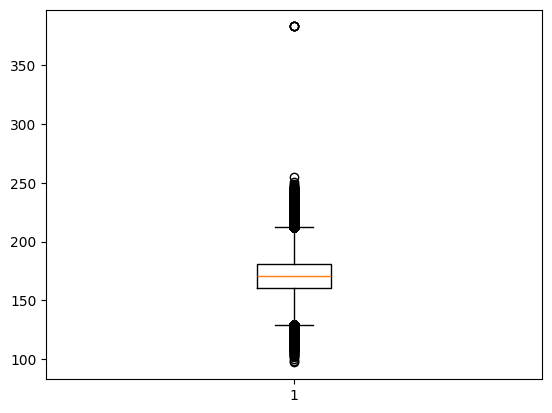

In [47]:
plt.boxplot(x=telemetry_sin_duplicados['volt']);

In [54]:
seventy_fifth = telemetry_sin_duplicados['volt'].quantile(0.75)
twenty_fifth = telemetry_sin_duplicados['volt'].quantile(0.25)
volt_iqr = seventy_fifth - twenty_fifth
print(volt_iqr)

20.699494724999994


In [68]:
upper = seventy_fifth + (1.5 * volt_iqr)
lower = twenty_fifth - (1.5 * volt_iqr)
print(upper, lower)

212.0536642125 129.25568531250002


In [50]:
# Filtramos el dataframe
atipicos = telemetry_sin_duplicados[telemetry_sin_duplicados['volt'] > 200]
atipicos.shape


(28176, 10)

### Reemplazar valores extremos en el dataframe (Imputación)


In [41]:
# Calculamos las estadisticas descriptivas de Volt
telemetry_sin_duplicados['volt'].describe()

count    876100.000000
mean        170.778872
std          15.517321
min          97.333604
25%         160.304927
50%         170.607338
75%         181.004501
max         382.687076
Name: volt, dtype: float64

In [51]:
# Reemplazamos en el dataframe sin duplicados, el valor atípico 382.687076, por 170.7788
telemetry_sin_duplicados.loc[telemetry_sin_duplicados['volt'] > 300, 'volt'] = 170.7788
telemetry_sin_duplicados['volt'].describe()

count    876100.000000
mean        170.777663
std          15.509061
min          97.333604
25%         160.304927
50%         170.607338
75%         181.004422
max         255.124717
Name: volt, dtype: float64

### El último recursos...   eliminación

In [53]:
telemetry_sin_atipicos = telemetry_sin_duplicados[telemetry_sin_duplicados['volt'] != 382.687076]
telemetry_sin_atipicos.shape

(876100, 10)

## Alternativas para resolver el caso de valores faltantes
### Métodos de imputación

In [55]:
# Analizamos aquellos registros donde faltan datos
## Filtrar registros donde pressure es nulo 
filtro_PressureNA = telemetry_sin_duplicados[telemetry_sin_duplicados['pressure'].isna()]
filtro_PressureNA.head(5)

,datetime,machineID,volt,rotate,pressure,vibration,Columna1,GRUPO_Volt,GRUPO_Volt_2,volt_grupo
5153,21/8/2015 20:00,74,170.918892,430.724320,NaN,40.253415,NaN,GRUPO2,GRUPO3,"(170.607, 174.508]"
30176,23/4/2015 02:00,1,204.789754,369.026200,NaN,39.667222,NaN,GRUPO2,GRUPO4,"(190.617, 382.687]"
34217,5/7/2015 18:00,99,174.221316,427.978309,NaN,35.623057,NaN,GRUPO2,GRUPO3,"(170.607, 174.508]"
39579,5/6/2015 19:00,83,171.998008,355.537555,NaN,30.515283,NaN,GRUPO2,GRUPO3,"(170.607, 174.508]"
62420,18/11/2015 13:00,55,167.379093,408.034747,NaN,39.499060,NaN,GRUPO2,GRUPO2,"(166.74, 170.607]"


In [56]:
telemetry_sin_duplicados.isna().sum()

datetime             0
machineID            0
volt                 0
rotate               0
pressure           100
vibration            0
Columna1        876100
GRUPO_Volt           0
GRUPO_Volt_2         0
volt_grupo           0
dtype: int64

In [57]:
telemetry_sin_duplicados['pressure'].describe()

count    876000.000000
mean        100.858828
std          11.048863
min          51.237106
25%          93.498085
50%         100.425947
75%         107.555402
max         185.951998
Name: pressure, dtype: float64

In [58]:
df=telemetry_sin_duplicados.copy()
df['pressure'] = df['pressure'].fillna(df['pressure'].mean())           # imputación con media
df.isna().sum()

datetime             0
machineID            0
volt                 0
rotate               0
pressure             0
vibration            0
Columna1        876100
GRUPO_Volt           0
GRUPO_Volt_2         0
volt_grupo           0
dtype: int64

In [59]:
df=telemetry_sin_duplicados.copy()
df['pressure'] = df['pressure'].fillna(df['pressure'].median())         # imputación con mediana
df.isna().sum()

datetime             0
machineID            0
volt                 0
rotate               0
pressure             0
vibration            0
Columna1        876100
GRUPO_Volt           0
GRUPO_Volt_2         0
volt_grupo           0
dtype: int64

In [60]:
df=telemetry_sin_duplicados.copy()
df['pressure'] = df['pressure'].ffill()            # imputación forward / backward 
df.isna().sum()
# El método por method='ffill' usa el último valor conocido
# El método por method='bfill' usa el siguiente valor conocido

datetime             0
machineID            0
volt                 0
rotate               0
pressure             0
vibration            0
Columna1        876100
GRUPO_Volt           0
GRUPO_Volt_2         0
volt_grupo           0
dtype: int64

In [61]:
df=telemetry_sin_duplicados.copy()
df['pressure'] = df['pressure'].interpolate(method='linear')       # imputación por interpolación lineal
df.isna().sum()

datetime             0
machineID            0
volt                 0
rotate               0
pressure             0
vibration            0
Columna1        876100
GRUPO_Volt           0
GRUPO_Volt_2         0
volt_grupo           0
dtype: int64

## Identificando patrones entre las variables 

In [62]:
#Analicemos los promedio de pressure por tipo de modelo de máquina, pero antes hay que integrar los datos de telemetría depurados y los datos de máquina
data_integrada = pd.merge(telemetry_sin_duplicados, df_PdM_machines, on='machineID', how='left')  
data_integrada.head()

,datetime,machineID,volt,rotate,pressure,vibration,Columna1,GRUPO_Volt,GRUPO_Volt_2,volt_grupo,model,age
0,8/12/2015 15:00,79,194.071741,484.698993,101.085953,47.317101,NaN,GRUPO2,GRUPO3,"(190.617, 382.687]",model3,14
1,11/12/2015 06:00,15,153.546984,454.170621,113.613686,38.416344,NaN,GRUPO1,GRUPO1,"(151.081, 157.729]",model3,14
2,28/6/2015 20:00,62,122.492361,386.409669,102.970808,41.206891,NaN,GRUPO1,GRUPO1,"(97.333, 151.081]",model4,20
3,24/7/2015 04:00,51,183.098835,448.021654,108.709299,41.493329,NaN,GRUPO2,GRUPO3,"(178.679, 183.615]",model4,19
4,28/1/2015 15:00,60,167.079133,404.744703,104.446543,35.706153,NaN,GRUPO2,GRUPO2,"(166.74, 170.607]",model4,3


In [63]:
#Analicemos los promedio de pressure por tipo de modelo de máquina
data_integrada.pivot_table(values='pressure',columns='model',aggfunc=['median', 'mean', 'std']).round(2)

median                            mean                          \
model     model1  model2  model3  model4  model1  model2  model3  model4   
pressure  100.67  100.64  100.32  100.32  101.27  101.22  100.67  100.67   

            std                       
model    model1 model2 model3 model4  
pressure  11.47  11.38  10.85  10.86

In [64]:
# Se crea un arreglo con los valores que vamos a imputar
valores_por_categoria = {
    'model1': 101.27,
    'model2': 101.22,
    'model3': 100.67,
    'model4': 100.67
}

data_integrada['pressure'] = data_integrada['pressure'].fillna(data_integrada['model'].map(valores_por_categoria))

In [65]:
#Validamos si quedaron valores faltantes
data_integrada.isna().sum()

datetime             0
machineID            0
volt                 0
rotate               0
pressure             0
vibration            0
Columna1        876100
GRUPO_Volt           0
GRUPO_Volt_2         0
volt_grupo           0
model                0
age                  0
dtype: int64

In [66]:
#### Agrupar registros bajo las categorías de v2,  sumando los valores de v1 
data_integrada = data_integrada.groupby('model', as_index=False)['pressure'].mean()
data_integrada

# Otras métricas que podemos usar:
# sum() - suma
# mean() - Promedio
# count() - Conteo de registro
# min() - Valor(es) mínimo
# max() - Valor(es) máximo
# std() - Desviación estándar
# var() - Varianza
# nunique()	- Conteo de valores únicos


,model,pressure
0,model1,101.269020
1,model2,101.216593
2,model3,100.667934
3,model4,100.672473


In [67]:
# Eliminamos la variable Columna1 que tiene todos los datos faltantes
data_integrada.drop(columns=['Columna1'], inplace=True)
data_integrada.dtypes

KeyError: "['Columna1'] not found in axis"

## Transformación de formatos de variables 

In [ ]:
##### Cambio de formato de una variable
data["V5"]=data["V5"].astype(float)  

##### formatos que se puede utilizar
##### int / int64 - convierte a enteros
##### float / float64 - convierte a Números decimales
##### int32 /  float32 - versiones de menor precisión
##### 'Int64' - (con mayúscula) convierte a enteros que permiten nulos (nullable)
##### 'str' - convierte a texto
##### data['col'] = pd.to_datetime(data['col']) convierte a fecha

##### Hacer varios cambios de formato a la vez
data = data.astype({
    'edad': 'int',
    'ingresos': 'float',
    'genero': 'category'
})

#### Transformación de variables en formato datetime
# Extraer el mes
data['mes'] = data['fecha a transformar'].dt.month

# Extrae el año
data['año'] = data['fecha a transformar'].dt.year

## Cómo guardar dataframes en formato CSV o excel

In [ ]:
data.to_csv('file_name.csv', index=False)

In [ ]:
data.to_excel('file_name.xlsx', index=False)